In [10]:
import torch
import torchvision
import os
import torchvision.transforms as transforms
import numpy as np

In [156]:
root = './data'
if not os.path.exists(root):
    os.mkdir(root)
#trans = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (1.0,))])
data = torchvision.datasets.MNIST(root,download=True, transform = transforms.ToTensor())

In [157]:
data = [x for x in data if x[1]==1 or x[1]==2]

In [158]:
data_1 = [x for x in data if x[1]==1]

In [189]:
data_2 = [x for x in data if x[1]==2]

In [38]:
data_1 = np.array([data_1[i][0].view(1, 28*28).numpy()[0] for i in range(len(data_1))])

In [57]:
data_2 = np.array([data_2[i][0].view(1, 28*28).numpy()[0] for i in range(len(data_2))])

In [46]:
data_1_train = data_1[:int(round(len(data_1)*0.8,0))]

In [47]:
data_1_test = data_1[int(round(len(data_1)*0.8,0)):]

In [58]:
data_2_train = data_2[:int(round(len(data_2)*0.8,0))]
data_2_test = data_2[int(round(len(data_2)*0.8,0)):]

In [60]:
p_1=len(data_1_train)/ (len(data_1_train)+len(data_2_train))

In [61]:
p_2 = 1- p_1

In [63]:
p_1

0.5309055118110236

In [64]:
p_2

0.46909448818897637

In [53]:
mean_std_1 = []
for i in range(len(data_1[0])):
    col = []
    slice_col = data_1_train[:,i]
    col.append(np.mean(slice_col))
    col.append(np.std(slice_col))
    mean_std_1.append(col)

In [59]:
mean_std_2 = []
for i in range(len(data_2[0])):
    col = []
    slice_col = data_2_train[:,i]
    col.append(np.mean(slice_col))
    col.append(np.std(slice_col))
    mean_std_2.append(col)

In [83]:
def prob(res,u, sig):
    res = np.array(res)
    try:
        val = 1/(sig*(2*np.pi)**(1/2))*np.exp(-(res-u)**2/(2*sig**2))
    except:
        val = 0
    return val

In [ ]:
Поиск единичек

In [130]:
prob_1_1= []
for i in range(len(data_1[0])):
    slice_prob = data_1_test[:,i]
    prob_val = prob(slice_prob,mean_std_1[i][0], mean_std_1[i][0])
    prob_1_1.append(prob_val)

/home/natalka/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  after removing the cwd from sys.path.
/home/natalka/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.
/home/natalka/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.
/home/natalka/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in multiply
  after removing the cwd from sys.path.


In [131]:
prob_1_2= []
for i in range(len(data_1[0])):
    slice_prob = data_1_test[:,i]
    prob_val = prob(slice_prob,mean_std_2[i][0], mean_std_2[i][0])
    prob_1_2.append(prob_val)

/home/natalka/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  after removing the cwd from sys.path.
/home/natalka/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.
/home/natalka/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.
/home/natalka/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in multiply
  after removing the cwd from sys.path.


In [132]:
prob_1_1 = np.array(prob_1_1).T

In [133]:
prob_1_2 = np.array(prob_1_2).T

In [134]:
prob_1_1 = (prob_1_1 *p_1)/(prob_1_1 + prob_1_2)

/home/natalka/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.
/home/natalka/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


In [135]:
prob_1_2 = (prob_1_2 *p_2)/(prob_1_1 + prob_1_2)

In [136]:
prob_1_1 = [np.sum(np.log(prob_1_1[x][np.isfinite(prob_1_1[x])])) for x in range(len(prob_1_1))]

/home/natalka/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


In [137]:
prob_1_2 = [np.sum(np.log(prob_1_2[x][np.isfinite(prob_1_2[x])])) for x in range(len(prob_1_2))]

/home/natalka/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


In [145]:
if_1 = [1 if prob_1_1[i]>prob_1_2[i] else 0 for i in range(len(prob_1_1))]

In [146]:
sum(if_1)/len(if_1)

0.7047477744807121

In [147]:
if_1[:10]

[1, 1, 0, 0, 1, 0, 1, 1, 0, 0]

In [148]:
import matplotlib.pyplot as plt

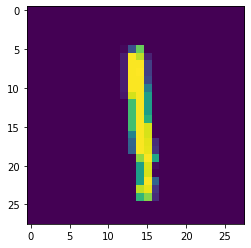

In [165]:
plt.imshow(data_1[2][0][0])

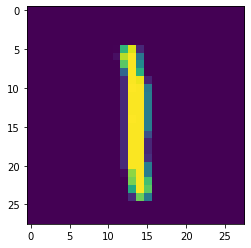

In [166]:
plt.imshow(data_1[3][0][0])

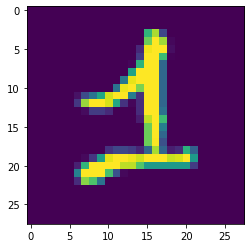

In [167]:
plt.imshow(data_1[5][0][0])

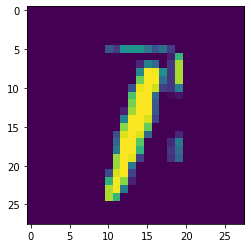

In [168]:
plt.imshow(data_1[8][0][0])

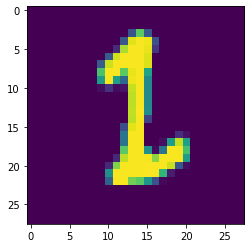

In [169]:
plt.imshow(data_1[9][0][0])

In [ ]:
Поиск двоек

In [170]:
prob_2_1= []
for i in range(len(data_2[0])):
    slice_prob = data_2_test[:,i]
    prob_val = prob(slice_prob,mean_std_1[i][0], mean_std_1[i][0])
    prob_2_1.append(prob_val)

/home/natalka/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  after removing the cwd from sys.path.
/home/natalka/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.
/home/natalka/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.
/home/natalka/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in multiply
  after removing the cwd from sys.path.


In [171]:
prob_2_2= []
for i in range(len(data_2[0])):
    slice_prob = data_2_test[:,i]
    prob_val = prob(slice_prob,mean_std_2[i][0], mean_std_2[i][0])
    prob_2_2.append(prob_val)

/home/natalka/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  after removing the cwd from sys.path.
/home/natalka/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.
/home/natalka/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.
/home/natalka/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in multiply
  after removing the cwd from sys.path.


In [172]:
prob_2_1 = np.array(prob_2_1).T

In [173]:
prob_2_2 = np.array(prob_2_2).T

In [174]:
prob_2_1 = (prob_2_1 *p_1)/(prob_2_1 + prob_2_2)

/home/natalka/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.
/home/natalka/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


In [175]:
prob_2_2 = (prob_2_2 *p_2)/(prob_2_1 + prob_2_2)

In [176]:
prob_2_1 = [np.sum(np.log(prob_2_1[x][np.isfinite(prob_2_1[x])])) for x in range(len(prob_2_1))]

/home/natalka/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


In [177]:
prob_2_2 = [np.sum(np.log(prob_2_2[x][np.isfinite(prob_2_2[x])])) for x in range(len(prob_2_2))]

/home/natalka/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


In [178]:
if_2 = [1 if prob_2_1[i]<prob_2_2[i] else 0 for i in range(len(prob_2_1))]

In [179]:
sum(if_2)/len(if_2)

0.9370805369127517

In [186]:
res=[]
k=-1
for i in if_2:
    k=k+1
    if i==0:
        res.append(k)

In [187]:
res[:5]

[4, 28, 32, 34, 69]

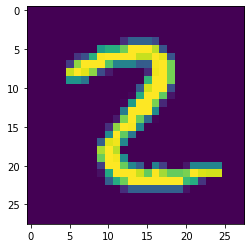

In [190]:
plt.imshow(data_2[4][0][0])

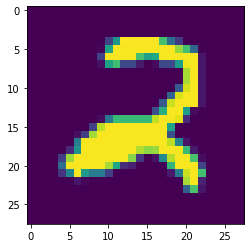

In [191]:
plt.imshow(data_2[28][0][0])

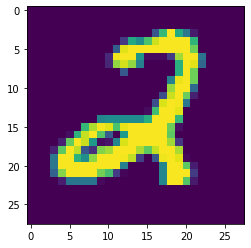

In [192]:
plt.imshow(data_2[32][0][0])

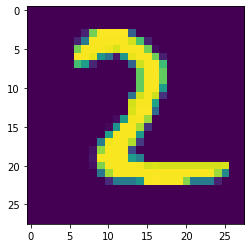

In [193]:
plt.imshow(data_2[34][0][0])

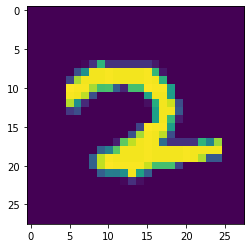

In [194]:
plt.imshow(data_2[69][0][0])